In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error 

from xgboost import XGBRegressor

In [5]:
# load the data into a dataframe
df = pd.read_csv('./vsc_hvdc_dataset.csv')

In [6]:
# peek at the data
df.columns

Index(['scenario_P1', 'scenario_Qg1', 'scenario_Qg2', 'scenario_AC1_Nom_1',
       'scenario_AC1_Nom_2', 'scenario_AC1_Nom_3', 'scenario_AC1_Nom_4',
       'scenario_AC1_Nom_5', 'scenario_AC1_Nom_6', 'scenario_AC1_MinTol_1',
       'scenario_AC1_MinTol_2', 'scenario_AC1_MinTol_3',
       'scenario_AC1_MinTol_4', 'scenario_AC1_MinTol_5',
       'scenario_AC1_MinTol_6', 'scenario_AC1_MaxTol_1',
       'scenario_AC1_MaxTol_2', 'scenario_AC1_MaxTol_3',
       'scenario_AC1_MaxTol_4', 'scenario_AC1_MaxTol_5',
       'scenario_AC1_MaxTol_6', 'scenario_AC2_Nom_1', 'scenario_AC2_Nom_2',
       'scenario_AC2_Nom_3', 'scenario_AC2_Nom_4', 'scenario_AC2_Nom_5',
       'scenario_AC2_Nom_6', 'scenario_AC2_MinTol_1', 'scenario_AC2_MinTol_2',
       'scenario_AC2_MinTol_3', 'scenario_AC2_MinTol_4',
       'scenario_AC2_MinTol_5', 'scenario_AC2_MinTol_6',
       'scenario_AC2_MaxTol_1', 'scenario_AC2_MaxTol_2',
       'scenario_AC2_MaxTol_3', 'scenario_AC2_MaxTol_4',
       'scenario_AC2_MaxTol_5', 's

In [4]:
# separate input and output features/columns
X = df.filter(regex='^scenario_', axis=1)
y = df.filter(regex='^solution_', axis=1)

In [5]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [6]:
# train a simple multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_train)

In [8]:
rmse = root_mean_squared_error(y_train, y_pred, multioutput='raw_values')

print("RMSE for each output feature:")
for name, value in zip(y.columns, rmse):
    print(f"{name}: {value}")


RMSE for each output feature:
solution_N_vw1: 1036.0900871915367
solution_N_vw2: 1114.1824601351443
solution_Qcab1_interm: 2332941.821364429
solution_Qcab2_interm: 1962233.5299744757
solution_Qf1_interm: 5926558.954366327
solution_Qf2: 4542982.589687272
solution_Rdc: 0.06010266196848558
solution_Vac1: 8496.681237366494
solution_Vac2: 8374.12700041647
solution_Vdc1: 351.224086425842
solution_Xtr1_pu: 0.0023861800921087563
solution_Xtr2_pu: 0.0024014420087357337
solution_ucab1: 0.0
solution_ucab2: 0.03448628739276288
solution_uf1: 0.0487028393360545
solution_uf2: 0.04869196486765983
solution_w1: 5.481588521022754
solution_w2: 6.333336825036664


In [20]:
# train an xgboost regression model
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=37))
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')


RMSE for each output feature:
solution_N_vw1: 1064.0262689844717
solution_N_vw2: 1110.4685069741636
solution_Qcab1_interm: 2918306.2287954404
solution_Qcab2_interm: 1828702.2532644393
solution_Qf1_interm: 3718912.705941089
solution_Qf2: 6799831.182958081
solution_Rdc: 0.06651533094034257
solution_Vac1: 10985.22760517056
solution_Vac2: 10338.149646998007
solution_Vdc1: 262.6704152815374
solution_Xtr1_pu: 0.0027043337295524954
solution_Xtr2_pu: 0.00246863384557364
solution_ucab1: 0.0
solution_ucab2: 5.662441253662109e-06
solution_uf1: 0.12159014532536762
solution_uf2: 0.17252380248032131
solution_w1: 6.067456686837562
solution_w2: 6.316289125681516

R^2 Score for each output feature:
solution_N_vw1: -0.5508811473846436
solution_N_vw2: -0.3368043899536133
solution_Qcab1_interm: -0.1798638105392456
solution_Qcab2_interm: -0.14389526844024658
solution_Qf1_interm: -5.936585903167725
solution_Qf2: -2.5145580768585205
solution_Rdc: -0.273764967918396
solution_Vac1: -0.25385117530822754
solutio

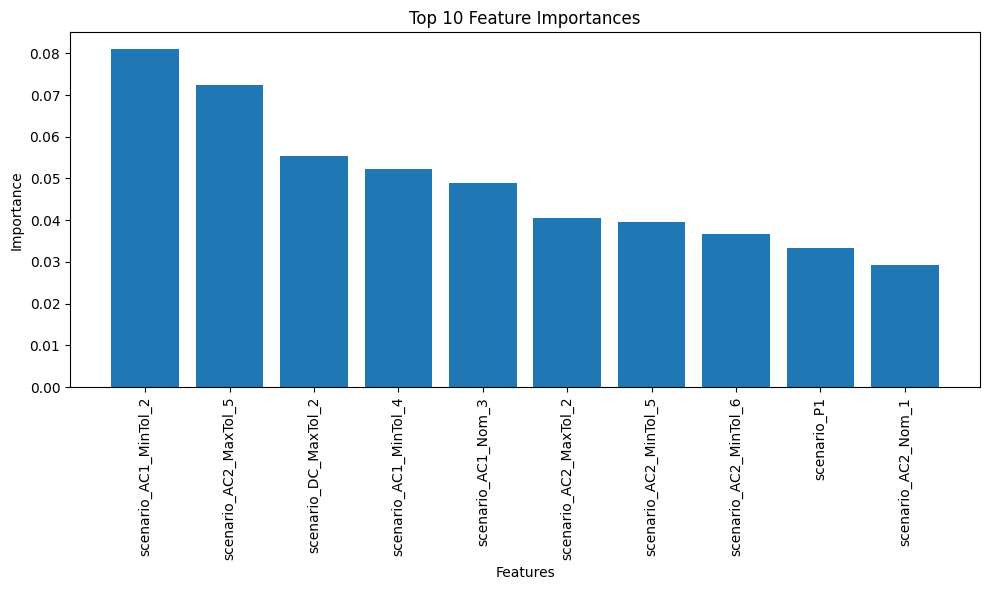

In [21]:
import matplotlib.pyplot as plt

print("RMSE for each output feature:")
for name, value in zip(y.columns, rmse):
    print(f"{name}: {value}")

print("\nR^2 Score for each output feature:")
for name, value in zip(y.columns, r2):
    print(f"{name}: {value}")


# feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.estimators_[0].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
